In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from google.colab import drive
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# # Specify the path to the pickle file
# pickle_file = "df_en.pickle"
# # Load the pickle file into a DataFrame
# df_en = pd.read_pickle(pickle_file)
# # print the size of the dataset
# print("The dataset contains {} rows.".format(df_en.shape[0]))
# # Display the loaded DataFrame
# df_en.head()

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Capstone/lyrics-data.csv')

Mounted at /content/drive


In [ ]:
df_en = df[df.language == 'en']
print("The dataset contains {} rows.".format(df_en.shape[0]))

The dataset contains 191814 rows.


In [ ]:
df_en['artist'] = df_en.ALink.transform(lambda x: x.replace('/', '').replace('-', ' ').lower())
df_en.columns = ['artistlink', 'songname','songlink','lyric','language','artist']
df_en

,artistlink,songname,songlink,lyric,language,artist
69,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en,ivete sangalo
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en,ivete sangalo
88,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en,ivete sangalo
111,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en,ivete sangalo
140,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en,ivete sangalo
...,...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en,clegg johnny
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en,clegg johnny
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en,clegg johnny
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en,clegg johnny


In [ ]:
top_artist = ['frank sinatra', 'elvis presley', 'dolly parton', 'lil wayne',
              'chris brown', 'guided by voices', 'prince', 'johnny cash', 'bob dylan',
              'george jones', 'neil young', 'bruce springsteen', 'snoop dogg',
              'eminem', '50 cent', 'roy orbison', 'ella fitzgerald', 'taylor swift',
              'waylon jennings', '2pac tupac shakur', 'bb king', 'bon jovi',
              'george strait', 'madonna', 'diana ross', 'bill monroe', 'beach boys',
              'barry manilow', 'alice cooper', 'nas', 'ray charles', 'beck']

In [ ]:
# Create a new DataFrame with only the rows that contain the top artists
df_en_top = df_en[df_en['artist'].isin(top_artist)]
#print a sentence with the size of the top dataset
print("The top dataset contains {} rows.".format(df_en_top.shape[0]))
df_en_top.head()

The top dataset contains 15006 rows.


,artistlink,songname,songlink,lyric,language,artist
5400,/50-cent/,In da Club,/50-cent/in-da-club.html,"Go, go, go, go\nGo, go, go shawty\nIt's your b...",en,50 cent
5401,/50-cent/,21 Questions,/50-cent/21-questions.html,(50 Cent)\nNew York City!\nYou are now rapping...,en,50 cent
5402,/50-cent/,P.I.M.P.,/50-cent/p-i-m-p.html,[Chorus]\nI don't know what you heard about me...,en,50 cent
5403,/50-cent/,Many Men (Wish Death),/50-cent/many-men-wish-death.html,[Lloyd Banks]\nMan we gotta go get something t...,en,50 cent
5404,/50-cent/,Candy Shop,/50-cent/candy-shop.html,Yeah...\nUh huh\nSo seductive\n\nI'll take you...,en,50 cent


In [ ]:
# print all the unique characters in the lyrics
print("The dataset contains {} unique characters.".format(len(set(df_en_top['lyric']))))

The dataset contains 14767 unique characters.


In [ ]:
# Define the original vocabulary
original_vocab = set(['\n', ' ', '!', "'", ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])  #extracted from vocab_32 in training notebook

# Filter lyrics column to only contain characters in the original vocabulary containing both upper and lower case letters
df_en_top['filtered_lyrics'] = df_en_top['lyric'].apply(lambda x: "".join([c for c in x if c in original_vocab]))

df_en_top.head()

,artistlink,songname,songlink,lyric,language,artist,filtered_lyrics
5400,/50-cent/,In da Club,/50-cent/in-da-club.html,"Go, go, go, go\nGo, go, go shawty\nIt's your b...",en,50 cent,"Go, go, go, go\nGo, go, go shawty\nIt's your b..."
5401,/50-cent/,21 Questions,/50-cent/21-questions.html,(50 Cent)\nNew York City!\nYou are now rapping...,en,50 cent,50 Cent\nNew York City!\nYou are now rapping.....
5402,/50-cent/,P.I.M.P.,/50-cent/p-i-m-p.html,[Chorus]\nI don't know what you heard about me...,en,50 cent,Chorus\nI don't know what you heard about me\n...
5403,/50-cent/,Many Men (Wish Death),/50-cent/many-men-wish-death.html,[Lloyd Banks]\nMan we gotta go get something t...,en,50 cent,Lloyd Banks\nMan we gotta go get something to ...
5404,/50-cent/,Candy Shop,/50-cent/candy-shop.html,Yeah...\nUh huh\nSo seductive\n\nI'll take you...,en,50 cent,Yeah...\nUh huh\nSo seductive\n\nI'll take you...


In [ ]:
def preprocess_lyrics(lyrics):
    # Tokenize the lyrics into words
    words = word_tokenize(lyrics.lower())
    words = [w for w in words if w.isalnum()]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]

    return " ".join(lemmatized_words)

# Apply the preprocess_lyrics function to the filtered_lyrics column
df_en_top['processed_lyric'] = df_en_top['filtered_lyrics'].apply(preprocess_lyrics)
df_en_top.head()

,artistlink,songname,songlink,lyric,language,artist,filtered_lyrics,processed_lyric
5400,/50-cent/,In da Club,/50-cent/in-da-club.html,"Go, go, go, go\nGo, go, go shawty\nIt's your b...",en,50 cent,"Go, go, go, go\nGo, go, go shawty\nIt's your b...",go go go go go go go shawty it your birthday w...
5401,/50-cent/,21 Questions,/50-cent/21-questions.html,(50 Cent)\nNew York City!\nYou are now rapping...,en,50 cent,50 Cent\nNew York City!\nYou are now rapping.....,50 cent new york city you are now rapping with...
5402,/50-cent/,P.I.M.P.,/50-cent/p-i-m-p.html,[Chorus]\nI don't know what you heard about me...,en,50 cent,Chorus\nI don't know what you heard about me\n...,chorus i do know what you heard about me but a...
5403,/50-cent/,Many Men (Wish Death),/50-cent/many-men-wish-death.html,[Lloyd Banks]\nMan we gotta go get something t...,en,50 cent,Lloyd Banks\nMan we gotta go get something to ...,lloyd bank man we got ta go get something to e...
5404,/50-cent/,Candy Shop,/50-cent/candy-shop.html,Yeah...\nUh huh\nSo seductive\n\nI'll take you...,en,50 cent,Yeah...\nUh huh\nSo seductive\n\nI'll take you...,yeah uh huh so seductive i take you to the can...


In [ ]:
# lemmatizer and isalnum turns words like don't into do. Might want to correct this.

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("dont")

'dont'

In [ ]:
word_tokenize("don't")

['do', "n't"]

### Preprocess the lyrics for evaluation

In [ ]:
# Read original artist lyrics and generated text
def text_lyrics_preprocess(text_path):
    with open(text_path, "r", encoding="utf-8") as f:
        generated_text = f.read()

    # Tokenize texts into words
    generated_words = word_tokenize(generated_text.lower())
    generated_words = [w for w in generated_words if w.isalnum()] # Forgot this

    #lemmatize the words
    lemmatizer = WordNetLemmatizer()
    generated_words = [lemmatizer.lemmatize(w) for w in generated_words]

    return generated_words #list of strings


top_artist = ['frank sinatra', 'elvis presley', 'dolly parton', 'lil wayne',
              'chris brown', 'guided by voices', 'prince', 'johnny cash', 'bob dylan',
              'george jones', 'neil young', 'bruce springsteen', 'snoop dogg',
              'eminem', '50 cent', 'roy orbison', 'ella fitzgerald', 'taylor swift',
              'waylon jennings', '2pac tupac shakur', 'bb king', 'bon jovi',
              'george strait', 'madonna', 'diana ross', 'bill monroe', 'beach boys',
              'barry manilow', 'alice cooper', 'nas', 'ray charles', 'beck']

# for artist in top_artist:
#     generated_words = text_lyrics_preprocess("MySavedModel/" + artist + "_output.txt")
#     df_artist = df_en_top[df_en_top.artist == artist]
# print(generated_text)
#Read and preprocess generated words

# generated_words = text_lyrics_preprocess("/content/drive/MyDrive/Capstone/MySavedModel/taylor swift_output_20230323_song2.txt")
# generated_song = " ".join(generated_words)
# print(generated_song)
# generated_vocab = set(generated_words)


# Calculate Jaccard similarities for each row
artist_name = 'taylor swift'
df_artist = df_en_top[df_en_top.artist == artist_name]

### Vocabulary Overlap

In [ ]:
def vocabulary_overlap(artist_name, generated_words,df_artist):
    def jaccard_similarity(set_a, set_b):
        intersection = set_a.intersection(set_b)
        union = set_a.union(set_b)
        return len(intersection) / len(union) if len(union) > 0 else 0

    generated_vocab = set(generated_words)
    similarities = []
    for index, row in df_artist.iterrows():
        artist_words = row['processed_lyric']
        artist_vocab = set(artist_words.split())  # Split the string into a list of words before converting to a set
        similarity = jaccard_similarity(artist_vocab, generated_vocab)
        similarities.append(similarity)

    # Calculate the average Jaccard similarity
    average_similarity = sum(similarities) / len(similarities)

    print(f"Average Vocabulary Overlap of {artist_name}: {average_similarity:.4f}")
    return average_similarity

average_similarity = vocabulary_overlap(artist_name, generated_words,df_artist)

Calculate the metric for all top artists

In [ ]:
# for artist in top_artist:
#     generated_words = text_lyrics_preprocess("MySavedModel/" + artist + "_output.txt")
#     df_artist = df_en_top[df_en_top.artist == artist]
#     average_similarity = vocabulary_overlap(artist, generated_words,df_artist)


### Word Variations
Definition: Number of unique words divided by the total number of words in lyrics

In [ ]:
def word_variation_metric(df_artist, generated_words):
    def word_variation(words):
        unique_words = set(words)
        return round(len(unique_words) / len(words),2) if len(words) > 0 else 0

    # Calculate word variations for each row
    word_variations = []
    for index, row in df_artist.iterrows():
        artist_words = row['processed_lyric'].split(' ')  # Split the string into a list of words
        # return len(artist_words)
        variation = word_variation(artist_words)
        # return variation
        word_variations.append(variation)
    # return word_variations
    # print(len(word_variations))
    # Calculate the average word variation
    average_variation = round(sum(word_variations) / len(word_variations),2)
    print(f"Average word variation: {average_variation:.4f}")

    # Calculate word variation for the generated text
    generated_variation = word_variation(generated_words)
    print(f"Word variation in generated text: {generated_variation:.4f}")
    return average_variation, generated_variation

word_variation_metric(df_artist, generated_words)

### Word Repetition
Definition: number of occurrences of a repeated word. For example, “oh baby baby” would count as
a single Word Repetition, whereas “baby baby baby” would count as two Word Repetitions.

In [ ]:
from collections import Counter

def word_repetition_metric(df_artist, generated_words):
    def count_word_repetitions(words):
        word_counts = Counter(words)
        repetitions = sum(count - 1 for count in word_counts.values() if count > 1)
        return repetitions

    # Calculate word repetitions for each row
    repetitions = []
    for index, row in df_artist.iterrows():
        artist_words = row['processed_lyric'].split()
        repetition = count_word_repetitions(artist_words)
        repetitions.append(repetition)

    # Calculate the average word repetitions
    average_repetitions = round(sum(repetitions) / len(repetitions),2)
    print(f"Average word repetitions: {average_repetitions:.2f}")

    # Calculate word repetitions for the generated text
    generated_repetitions = count_word_repetitions(generated_words)
    print(f"Generated text word repetitions: {generated_repetitions}")
    return average_repetitions, generated_repetitions

word_repetition_metric(df_artist, generated_words)

In [ ]:
# I think this one doesn't count only consequtive repeats but repeats across the song. Will change - Kenny

### Average Line Length

Average line length is calculated from the whole text file for each artist.

In [ ]:
def average_line_length(df_artist):
    generated_path = "/content/drive/MyDrive/Capstone/MySavedModel/taylor swift_output_20230323_song2.txt"

    # Concatenate all lyrics in the DataFrame into a single string
    artist_lyrics = "\n".join(df_artist['filtered_lyrics'])

    # Read the generated text
    with open(generated_path, "r", encoding="utf-8") as f:
        generated_text = f.read()

    # Split texts into lines
    artist_lines = artist_lyrics.splitlines()
    generated_lines = generated_text.splitlines()

    # Calculate the average line length
    avg_artist_line_length = round(sum(len(line) for line in artist_lines) / len(artist_lines),2)
    avg_generated_line_length = round(sum(len(line) for line in generated_lines) / len(generated_lines),2)

    return avg_artist_line_length, avg_generated_line_length

average_line_length(df_artist)

### Average Song Length (word count)

In [ ]:
def average_song_length(df_artist):

    # Initialize variables
    song_lengths = []
    generated_song_length = None
    
    # Compute number of words in song
    def compute_song_length(song):
        return len(song.split(' '))
    
    generated_song_length = compute_song_length(generated_song)
    
    # Compute song length for all actual songs and store in list
    for index, row in df_artist.iterrows():
        artist_words = row['processed_lyric']
        song_lengths.append(compute_song_length(artist_words))

    # Compute averages
    avg_artist_song_length = round(sum(song_lengths)/len(song_lengths),2)
    generated_song_length = round(generated_song_length,2)

    return avg_artist_song_length,generated_song_length

average_song_length(df_artist)

### I vs You Point of View
number of lines that started with an “I” and subtracted the count of lines that started with a “you”, normalized by the total number of lines.

In [ ]:
def point_of_view(text):
    lines = text.splitlines()
    i_lines = sum(1 for line in lines if line.lower().startswith("i"))
    you_lines = sum(1 for line in lines if line.lower().startswith("you"))

    pov_metric = (i_lines - you_lines) / len(lines) * 100
    return pov_metric

def point_of_view_metric(df, generated_path):
    # Concatenate all lyrics in the DataFrame into a single string
    artist_lyrics = "\n".join(df['filtered_lyrics'])

    # Read the generated text
    with open(generated_path, "r", encoding="utf-8") as f:
        generated_text = f.read()

    # Calculate the point of view metric for original and generated lyrics
    point_of_view_original = point_of_view(artist_lyrics)
    point_of_view_generated = point_of_view(generated_text)

    return point_of_view_original, point_of_view_generated


# Calculate the point of view metric for original lyrics and generated lyrics
point_of_view_original, point_of_view_generated = point_of_view_metric(df_artist, "/content/drive/MyDrive/Capstone/MySavedModel/taylor swift_output_20230323_song2.txt")

print(f"Point of View (Original Lyrics): {point_of_view_original:.2f}%")
print(f"Point of View (Generated Lyrics): {point_of_view_generated:.2f}%")


### Word Variation vs Song Length

### scatter plot

In [ ]:
import os
from collections import Counter

In [ ]:
# Read original artist lyrics and generated text
def text_lyrics_preprocess(text_path):
    with open(text_path, "r", encoding="utf-8") as f:
        generated_text = f.read()

    # Tokenize texts into words
    generated_words = word_tokenize(generated_text.lower())
    generated_words = [w for w in generated_words if w.isalnum()] # Forgot this

    #lemmatize the words
    lemmatizer = WordNetLemmatizer()
    generated_words = [lemmatizer.lemmatize(w) for w in generated_words]

    return generated_words #list of strings

top_artist = ['frank sinatra', 'elvis presley', 'dolly parton', 'lil wayne',
              'chris brown', 'guided by voices', 'prince', 'johnny cash', 'bob dylan',
              'george jones', 'neil young', 'bruce springsteen', 'snoop dogg',
              'eminem', '50 cent', 'roy orbison', 'ella fitzgerald', 'taylor swift',
              'waylon jennings', '2pac tupac shakur', 'bb king', 'bon jovi',
              'george strait', 'madonna', 'diana ross', 'bill monroe', 'beach boys',
              'barry manilow', 'alice cooper', 'nas', 'ray charles', 'beck']

artist_name = 'taylor swift'
df_artist = df_en_top[df_en_top.artist == artist_name]

In [ ]:
def word_variation(song):
    words = song.split(' ')
    unique_words = set(words)
    if len(words) > 0:
        return round(len(unique_words) / len(words),2)
    else:
        return 0
    
def compute_song_length(song):
    return len(song.split(' '))

def count_word_repetitions(song):
    words = song.split(' ')
    word_counts = Counter(words)
    repetitions = sum(count - 1 for count in word_counts.values() if count > 1)
    return repetitions

In [ ]:
# make copy of df
ts_test = df_artist[['artist', 'songname', 'processed_lyric']].copy()

# add evaluation variables
ts_test['word_variation'] = ts_test.processed_lyric.apply(lambda x: word_variation(x))
ts_test['song_length'] = ts_test.processed_lyric.apply(lambda x: compute_song_length(x))
ts_test['word_repetition'] = ts_test.processed_lyric.apply(lambda x: count_word_repetitions(x))

# add color blue for visualization purposes
ts_test['color'] = 'blue'

# make variables for generated song
import os
directory = '/content/drive/MyDrive/Capstone/MySavedModel/taylor swift'
for filename in os.listdir(directory):
    generated_words = text_lyrics_preprocess(directory+"/"+filename)
    generated_song = " ".join(generated_words)
    artist_name = 'taylor swift'
    song_name = filename
    processed_lyrics = generated_song
    g_word_var = word_variation(generated_song)
    g_song_len = compute_song_length(generated_song)
    g_word_rep = count_word_repetitions(generated_song)
    g_color = 'red'

# Insert generated song into dataframe
    ts_test.loc[len(ts_test.index)] = [artist_name, song_name, processed_lyrics, g_word_var, g_song_len,g_word_rep, g_color] 

In [ ]:
ts_test

,artist,songname,processed_lyric,word_variation,song_length,word_repetition,color
30942,taylor swift,Lover,we could leave the christmas light up january ...,0.41,258,153,blue
30943,taylor swift,Blank Space,nice to meet you where you been i could show y...,0.34,498,328,blue
30944,taylor swift,cardigan,vintage tee brand new phone high heel on cobbl...,0.38,330,205,blue
30945,taylor swift,Shake It Off,i stay out too late got nothing in my brain th...,0.26,393,289,blue
30946,taylor swift,All Too Well,i walked through the door with you the air wa ...,0.42,454,262,blue
...,...,...,...,...,...,...,...
390,taylor swift,taylor swift_output_20230328_song6.txt,hink of anything else now that we done and i b...,0.59,197,81,red
391,taylor swift,taylor swift_output_20230328_song7.txt,hink i bulletproof but i not you took a swing ...,0.61,211,82,red
392,taylor swift,taylor swift_output_20230328_song8.txt,his way too far it leave you breathless or wit...,0.62,201,77,red
393,taylor swift,taylor swift_output_20230328_song9.txt,his could be the one that you ever had and i s...,0.48,212,110,red


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

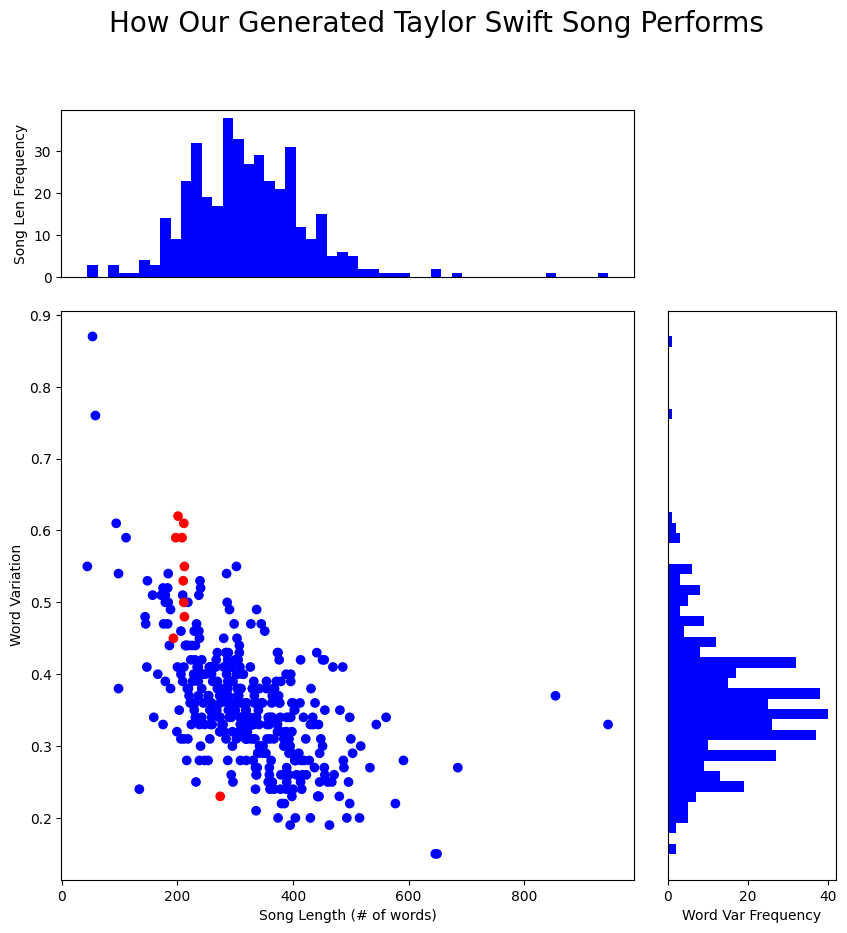

In [ ]:
fig = plt.figure(figsize=(10,10));
fig.suptitle('How Our Generated Taylor Swift Song Performs', fontsize=20);

gs = GridSpec(4, 4);

ax_scatter = fig.add_subplot(gs[1:4, 0:3]);
ax_hist_x = fig.add_subplot(gs[0,0:3]);
ax_hist_y = fig.add_subplot(gs[1:4, 3]);

ax_scatter.scatter(x=ts_test.song_length, y=ts_test.word_variation, c = ts_test.color);
ax_scatter.set_xlabel('Song Length (# of words)');
ax_scatter.set_ylabel('Word Variation');

ax_hist_x.hist(ts_test['song_length'], bins=50, color='blue');
ax_hist_x.set_xticks([]);
ax_hist_x.set_ylabel('Song Len Frequency');
# ax_hist_x.set_yticks([]);


ax_hist_y.hist(ts_test['word_variation'], orientation = 'horizontal', bins=50, color='blue');
# ax_hist_y.set_xticks([]);
ax_hist_y.set_yticks([]);
ax_hist_y.set_xlabel('Word Var Frequency');